# Projeto

## Data Preparation

### 2 Alternativas (mudar para 3 se houver tempo):
1. Standard Scaler

2. MinMax Scaler - aplicar nas simbolicas tambem, o grafico fica com valores acima de 1 senao o fizer

3. Aplicar os dois ao mesmo tempo em diff colunas

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import subplots, show
from matplotlib.pyplot import savefig
import dslabs_functions as dslabs
from sklearn.model_selection import train_test_split
#from matplotlib import figure
from matplotlib.pyplot import figure


## tratar da primeira coluna nos notebooks anteriores
filename = 'data_preparation_csvs/outliers_treatment_csvs/data_outliers_alt2_fill_mode.csv'
data_outliers: pd.DataFrame = pd.read_csv(filename, sep=',', decimal='.', na_values='')
data_outliers_2 = data_outliers.copy()
print(f"Dataset nr records={data_outliers.shape[0]}", f"nr variables={data_outliers.shape[1]}")
print(data_outliers.columns)
#print(data_encoded.dtypes)

# xx = ['Month', 'Occupation', 'Payment_of_Min_Amount', 'CreditMix'
#                  , 'Payment_Behaviour', 'Payday Loan', 'Personal Loan', 'Debt Consolidation Loan'
#                  , 'Auto Loan', 'Not Specified Loan', 'Student Loan', 'Credit-Builder Loan'
#                  , 'Mortgage Loan', 'Home Equity Loan', 'Credit_Score']
nonScalerColumns = ['Credit_Score']

Dataset nr records=100000 nr variables=32
Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'NumofLoan',
       'Delay_from_due_date', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'CreditMix', 'OutstandingDebt',
       'CreditUtilizationRatio', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'TotalEMIpermonth', 'Amountinvestedmonthly', 'Payment_Behaviour',
       'MonthlyBalance', 'Payday Loan', 'Auto Loan', 'Home Equity Loan',
       'Student Loan', 'Credit-Builder Loan', 'Not Specified Loan',
       'Mortgage Loan', 'Debt Consolidation Loan', 'Personal Loan',
       'Credit_Score'],
      dtype='object')


  File "c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


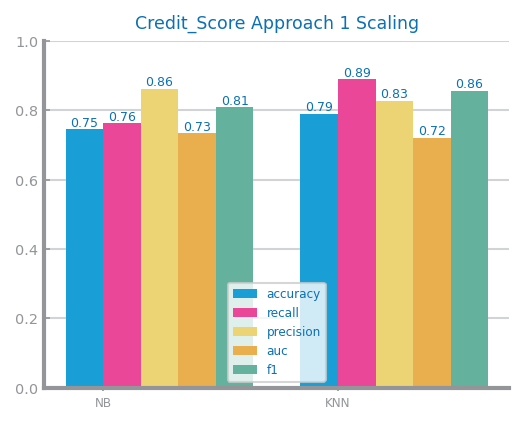

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    1.0
99999    0.0
Name: Credit_Score, Length: 100000, dtype: float64


In [2]:
# Alternativa 1 - stora

target = "Credit_Score"
vars: list[str] = data_outliers.columns.to_list()
target_data: pd.Series = data_outliers.pop(target)
transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(
    data_outliers
)
df_zscore = pd.DataFrame(transf.transform(data_outliers), index=data_outliers.index)
df_zscore[target] = target_data
df_zscore.columns = vars
df_zscore.to_csv(f"data_preparation_csvs/scaling_csvs/data_scaling_alt1_zscore.csv", index=False)

## Separate into Train and Test and save in different files
train_data, test_data = train_test_split(df_zscore, test_size=0.2, random_state=42)
## Save the training and testing sets to CSV files
train_data.to_csv('data_preparation_csvs/scaling_csvs/train_data_scaling_alt1_zscore.csv', index=False)
test_data.to_csv('data_preparation_csvs/scaling_csvs/test_data_scaling_alt1_zscore.csv', index=False)

## Evaluate Approach
file_tag = 'Credit_Score'

figure()
eval: dict[str, list] = dslabs.evaluate_approach(train_data, test_data, target=target, metric="recall")
dslabs.plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Approach 1 Scaling", percentage=True
)
savefig(f"data_preparation_images/scaling_result/data_scaling_alt1_zscore.png")
show()

print(df_zscore["Credit_Score"])

75220    1.0
48955    1.0
44966    1.0
13568    1.0
92727    1.0
        ... 
6265     1.0
54886    0.0
76820    1.0
860      1.0
15795    0.0
Name: Credit_Score, Length: 80000, dtype: float64
75721    1.0
80184    0.0
19864    1.0
76699    0.0
92991    1.0
        ... 
32595    1.0
29313    1.0
37862    0.0
53421    1.0
42410    1.0
Name: Credit_Score, Length: 20000, dtype: float64


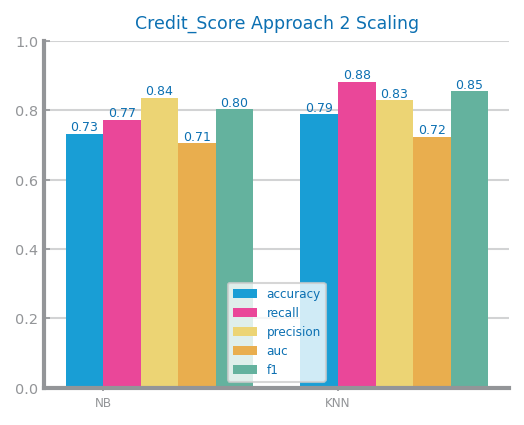

In [3]:
# Alternativa 2 - stora
target = 'Credit_Score'
target_data: pd.Series = data_outliers_2.pop(target)
transf: MinMaxScaler = MinMaxScaler(feature_range=(-5, 5), copy=True).fit(data_outliers_2)
df_minmax = pd.DataFrame(transf.transform(data_outliers_2), index=data_outliers_2.index)
df_minmax[target] = target_data
df_minmax.columns = vars
df_minmax.to_csv(f"data_preparation_csvs/scaling_csvs/data_scaling_alt2_minmax.csv", index=False)

## Separate into Train and Test and save in different files
train_data2, test_data2 = train_test_split(df_minmax, test_size=0.2, random_state=42)

## Save the training and testing sets to CSV files
train_data2.to_csv('data_preparation_csvs/scaling_csvs/train_data_scaling_alt2_minmax.csv', index=False)
test_data2.to_csv('data_preparation_csvs/scaling_csvs/test_data_scaling_alt2_minmax.csv', index=False)
print(train_data2['Credit_Score'])
print(test_data2['Credit_Score'])
## Evaluate Approach
file_tag = "Credit_Score"
target = "Credit_Score"

figure()
eval: dict[str, list] = dslabs.evaluate_approach(train_data2, test_data2, target=target, metric="recall")
dslabs.plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Approach 2 Scaling", percentage=True
)
savefig(f"data_preparation_images/scaling_result/data_scaling_alt2_minmax.png")
show()

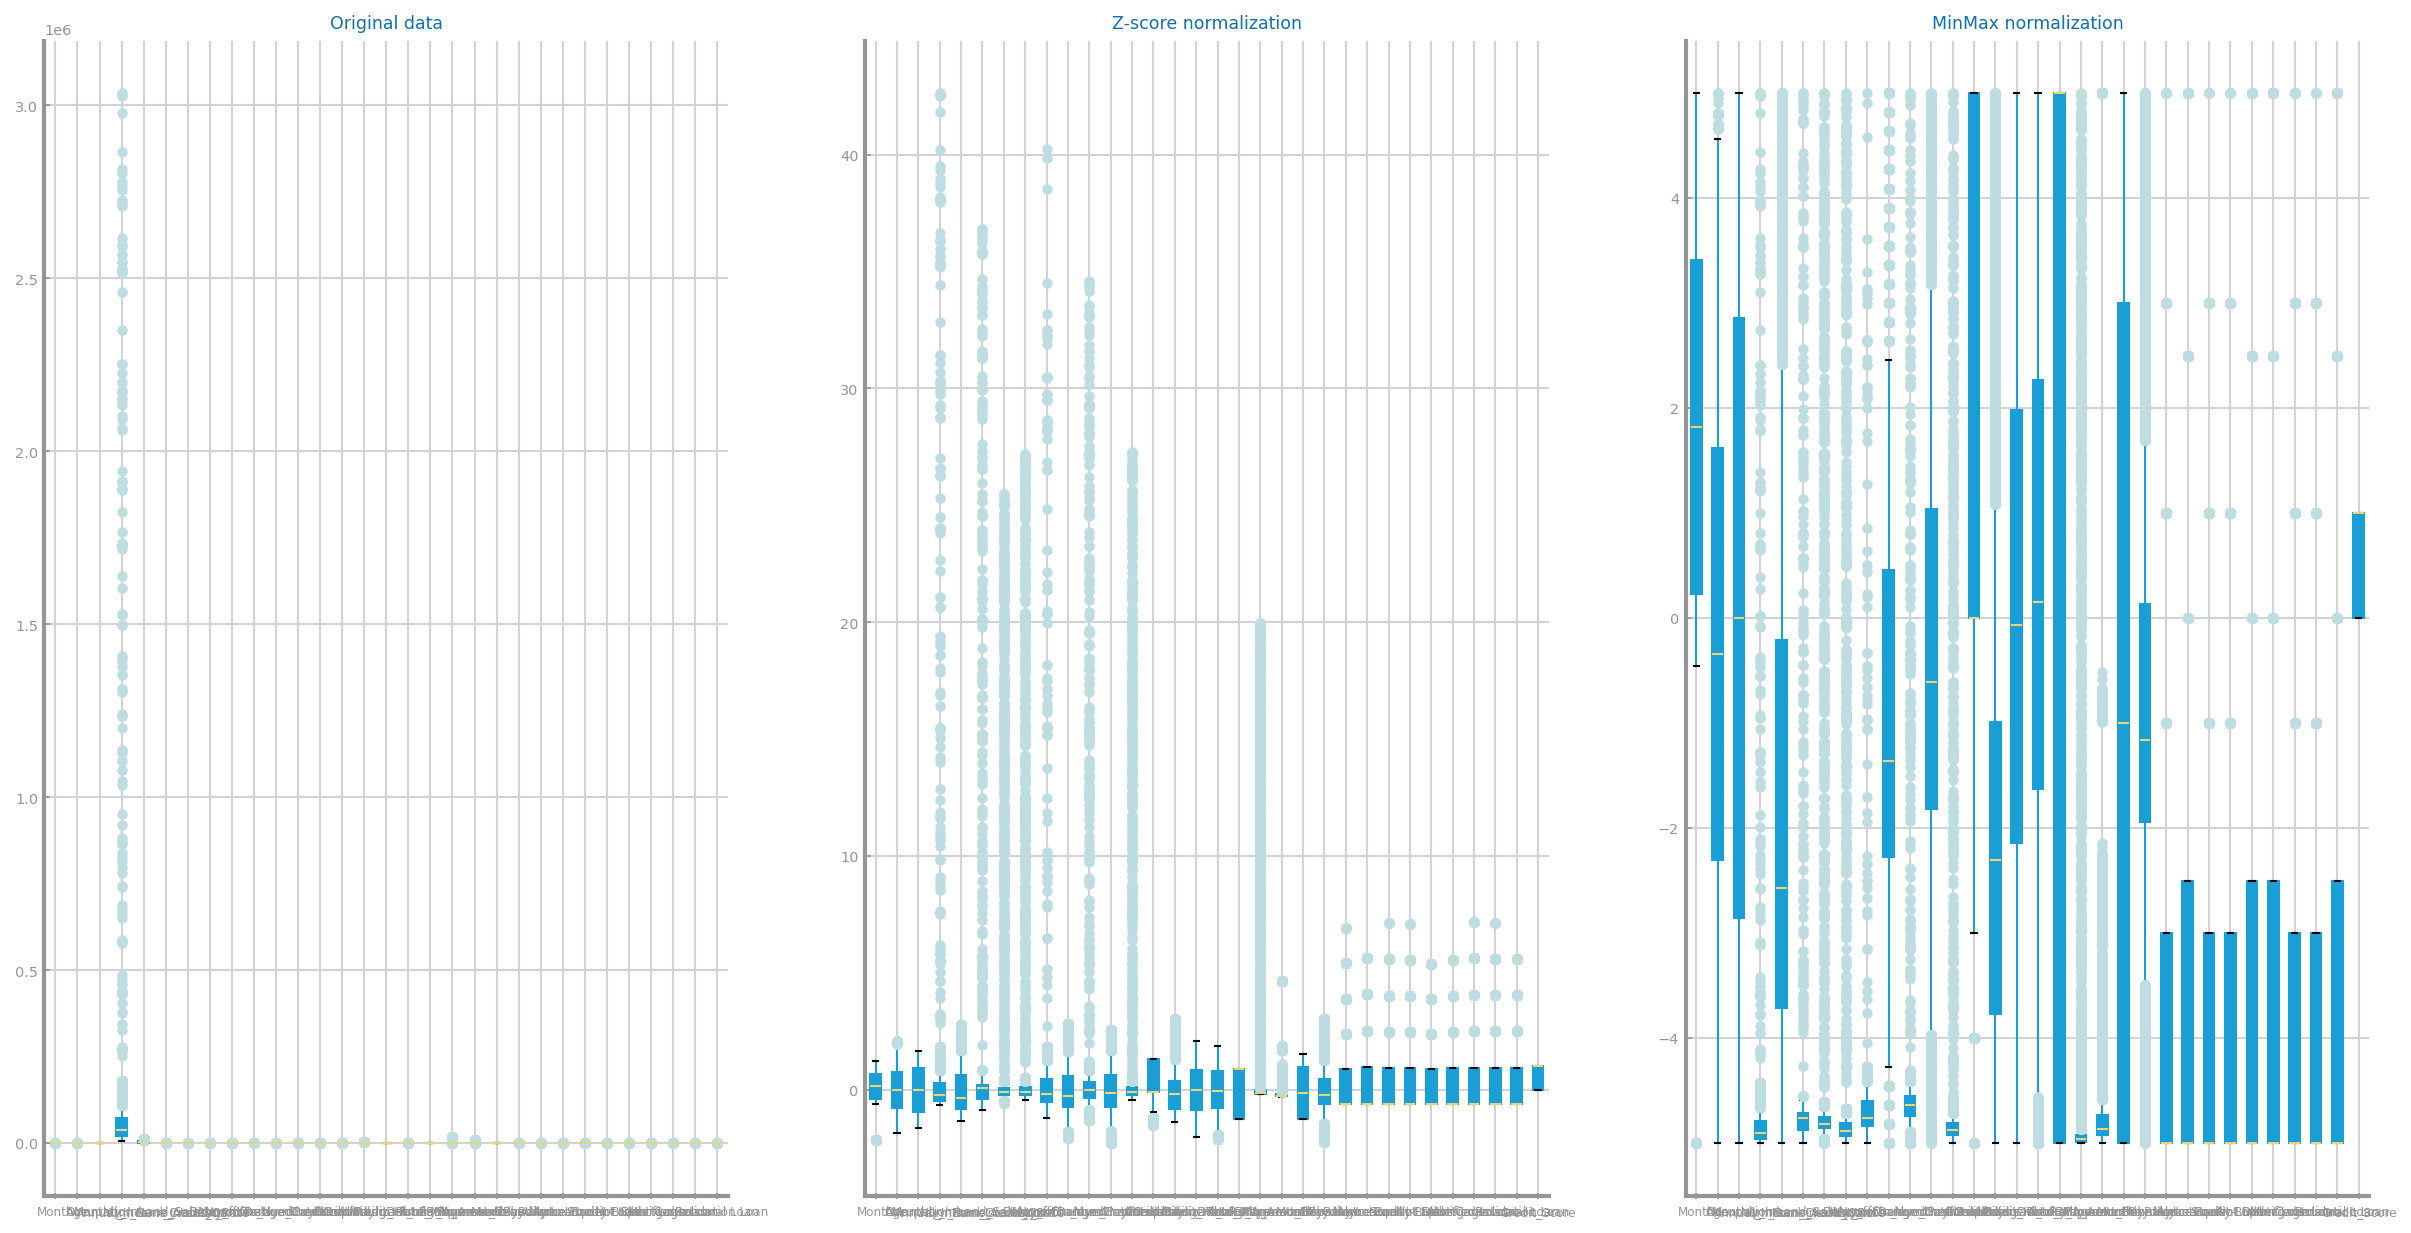

In [4]:
# Result of the transformed data with a single boxplot

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 0].set_title("Original data")
data_outliers.boxplot(ax=axs[0, 0])
axs[0, 1].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
savefig(f"data_preparation_images/scaling_result/data_scaling_boxplots.png")
show()